# Task 1

# Missing Values:

1. Are there any anomalies (unusual data or missing values) in the given dataset? Support your answer with appropriate argument.

In [53]:
data.isnull().any().sum()

0

In [54]:
data.duplicated().sum()

0

<AxesSubplot:>

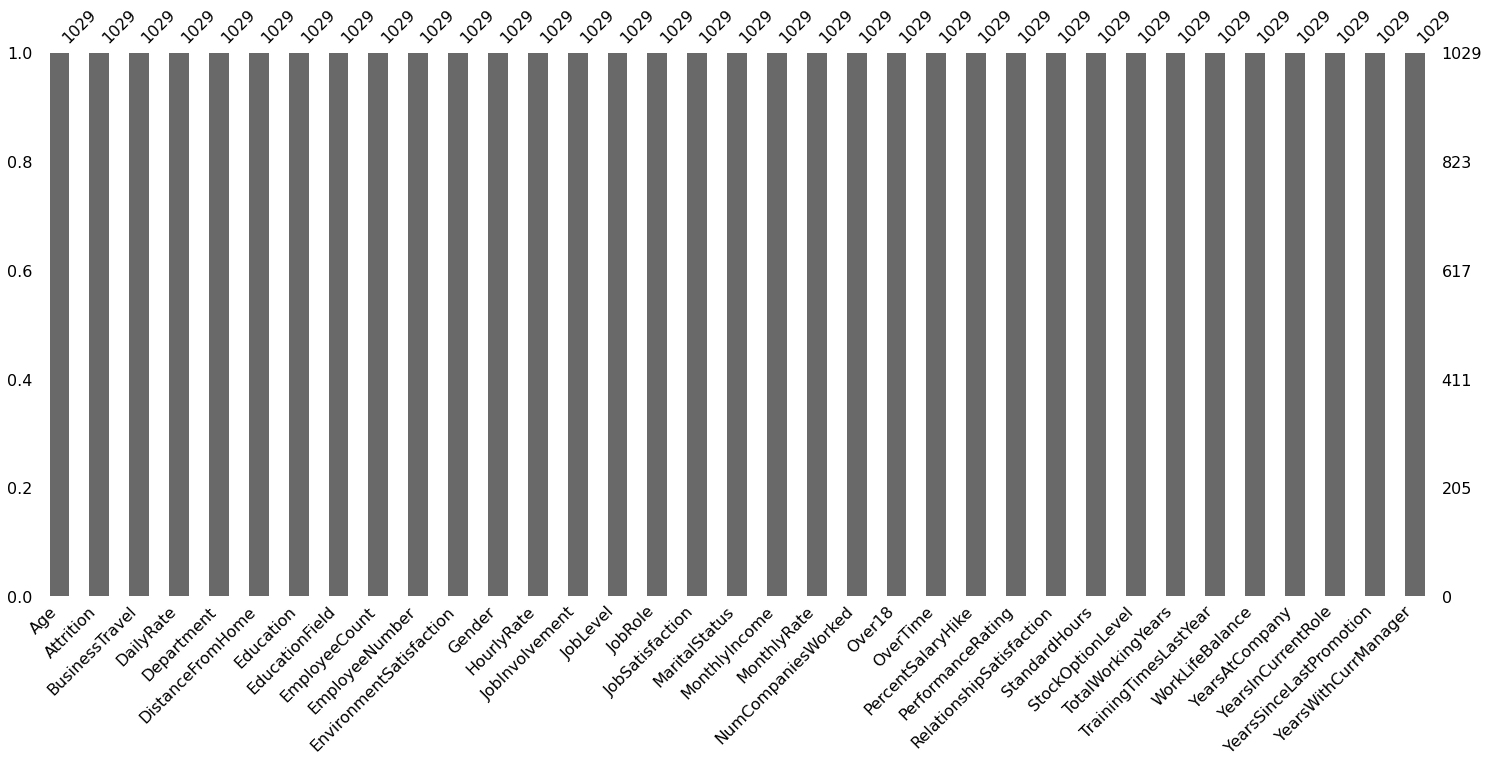

In [55]:
msno.bar(data)

There are no missing values nor duplicates in the dataset

2.List two possible strategies to handle cases with missing values in data (if applicable) & provide appropriate reasoning? 

Filling missing values with the mean; We fill with the mean when the data is normally distributed. And also mean can be used when filling missing values for continuous variables.

Filling missing values with the median : We fill with median when the data is skewed.

Filling with mode ' This is for categorical data.

Dropping the missing values : we can drop if there are not many or if they do not affect our data in terms loosing valuable information.

In [66]:
# Replace 'Yes' with 'yes' and 'No' with 'no'
data['Attrition'] = data['Attrition'].replace({'Yes': 1, 'No': 0})

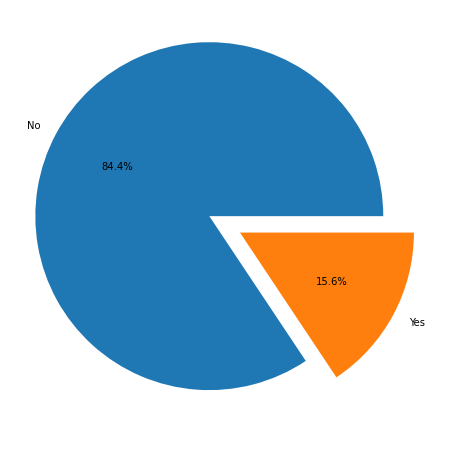

In [67]:
plt.figure(figsize=(8,8))
pie = data.groupby('Attrition')['Attrition'].count()
plt.pie(pie, explode=[0.1, 0.1], labels=['No', 'Yes'], autopct='%1.1f%%');

84% of the employees in the dataset have not left the company. 15% have left the company which is a quite a high percentage so we are going to perfom an anlysis to find out contributing factors to this attrition rate.

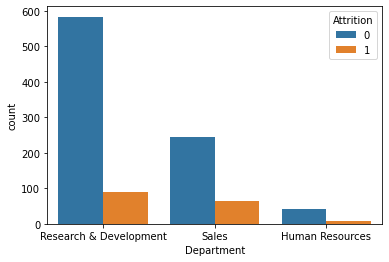

In [68]:
sns.countplot(x='Department', hue='Attrition', data=data);

Most attritions are from the research & development department only for sales department to come second by a small margin. Human resources has the least number of attritions. But we need to keep in mind that R&D has a lot more employees than sales and HR.

If we considered percentage of attritions per department, we would see that the HR department has most attritions.

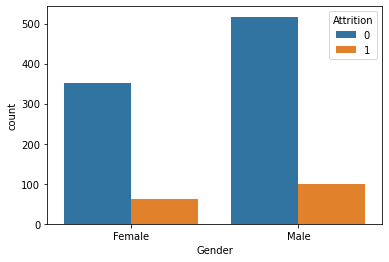

In [69]:
sns.countplot(x='Gender', hue='Attrition', data=data);

Clearly there are more males in the organisation than females, so attritions are higher but slightly. I don't think gender is too significant a factor behind attritions.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Research Scientist'),
  Text(1, 0, 'Sales Executive'),
  Text(2, 0, 'Sales Representative'),
  Text(3, 0, 'Research Director'),
  Text(4, 0, 'Manager'),
  Text(5, 0, 'Manufacturing Director'),
  Text(6, 0, 'Laboratory Technician'),
  Text(7, 0, 'Human Resources'),
  Text(8, 0, 'Healthcare Representative')])

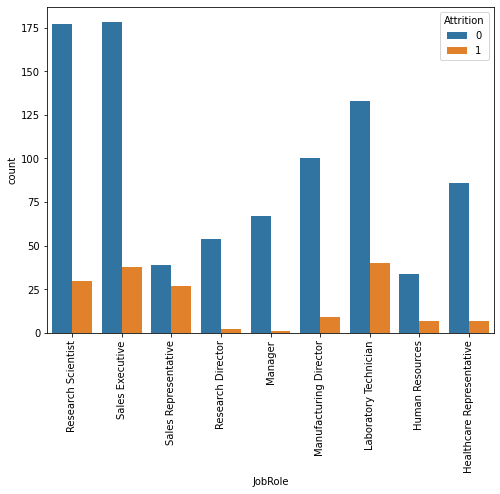

In [70]:
plt.figure(figsize=(8,6))
sns.countplot(x='JobRole', hue='Attrition', data=data);
plt.xticks(rotation=90)

Among job roles, most laboratory technicians have departed from their jobs, only for research scientists, sales executives and sales representatives (% wise) to trail behind. We could look into salaries of each job roles and see if that may be the reason.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Research Scientist'),
  Text(1, 0, 'Sales Executive'),
  Text(2, 0, 'Sales Representative'),
  Text(3, 0, 'Research Director'),
  Text(4, 0, 'Manager'),
  Text(5, 0, 'Manufacturing Director'),
  Text(6, 0, 'Laboratory Technician'),
  Text(7, 0, 'Human Resources'),
  Text(8, 0, 'Healthcare Representative')])

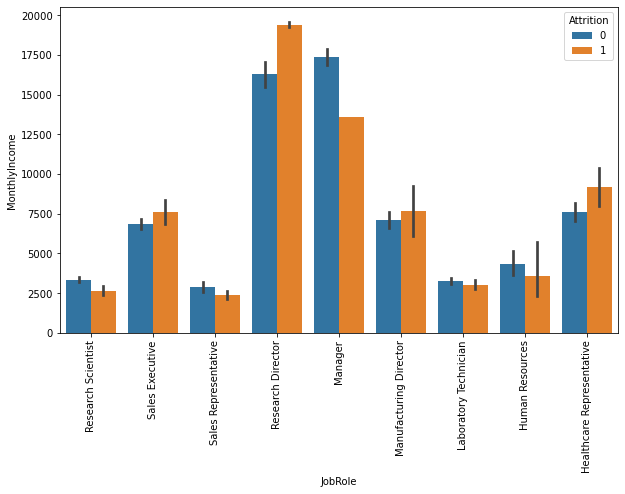

In [71]:
plt.figure(figsize=(10,6))
sns.barplot(x='JobRole', y='MonthlyIncome', hue='Attrition', data=data)
plt.xticks(rotation=90)

Laboratory technicians, research scientists and sales representatives and executives have very low salary and this could be a major factor behind attritions.

Also the HR department had the most attritions and we can see they have very low salaries as well so once again, this is another key insight.


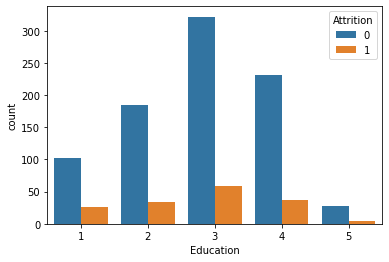

In [72]:
sns.countplot(x='Education', hue='Attrition', data=data);

1 'Below College',2 'College' ,3 'Bachelor' ,4 'Master' ,5 'Doctor'.
We can see that based on Education ,people who did bachelors are more in the company and also has a higher attrition rate.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Life Sciences'),
  Text(1, 0, 'Marketing'),
  Text(2, 0, 'Technical Degree'),
  Text(3, 0, 'Medical'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Human Resources')])

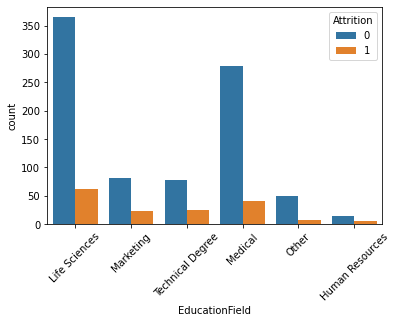

In [73]:
sns.countplot(x='EducationField', hue='Attrition', data=data);
plt.xticks(rotation=45)

I don't think the degrees of employees really matter here as most of the number of attritions are similar

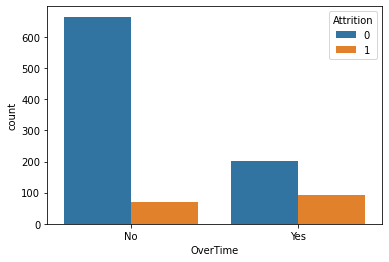

In [74]:
sns.countplot(x='OverTime', hue='Attrition', data=data);

Overtime hours aren't a very crucial factor either.

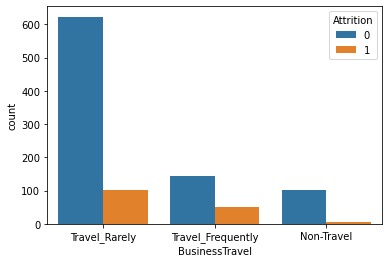

In [75]:
sns.countplot(x='BusinessTravel', hue='Attrition', data=data);

We can see that employees that travel frequently have a higher rate of attrition. An insight from this is that maybe the attrition is due to the number of times they are required to travel.

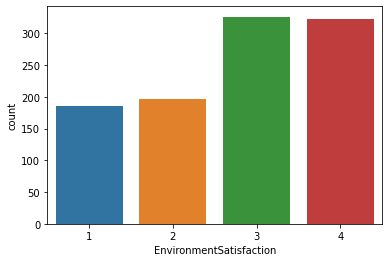

In [76]:
sns.countplot(x='EnvironmentSatisfaction', data=data);

Most employees seem to be satisfied with the working environment

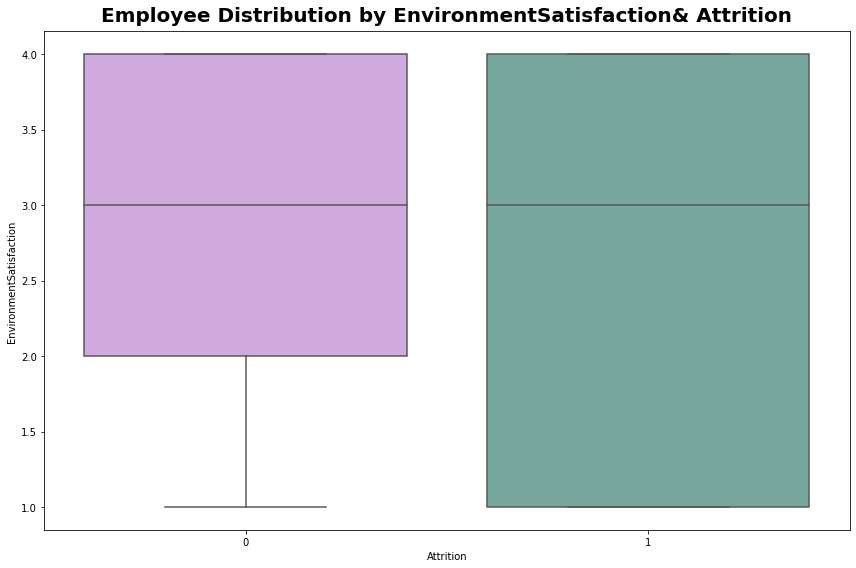

In [77]:
#Visualization to show Employee Distribution by Age & Attrition.
# plt.subplot(1,2,2)
plt.figure(figsize=(12, 8))
sns.boxplot(x="Attrition",y="EnvironmentSatisfaction",data=data,palette=["#D4A1E7","#6faea4"])
plt.title("Employee Distribution by EnvironmentSatisfaction& Attrition",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()

It seems environmental satisfaction is not a major factor contributing to attrition.

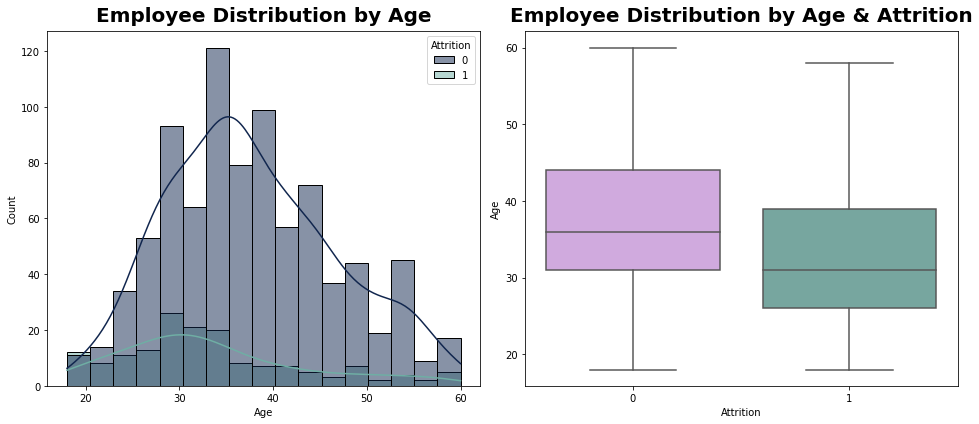

In [78]:
#Visualization to show Employee Distribution by Age.
plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)
sns.histplot(x="Age",hue="Attrition",data=data,kde=True,palette=["#11264e","#6faea4"])
plt.title("Employee Distribution by Age",fontweight="black",size=20,pad=10)


#Visualization to show Employee Distribution by Age & Attrition.
plt.subplot(1,2,2)
sns.boxplot(x="Attrition",y="Age",data=data,palette=["#D4A1E7","#6faea4"])
plt.title("Employee Distribution by Age & Attrition",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()

1.Most of the employees are between age 30 to 40.

2.We can clearly observe a trend that as the age is increasing the attrition is decreasing.

3.From the boxplot we can also observe that the medain age of employee who left the organization is less than the employees

who are working in the organization.

4.Employees with young age leaves the company more compared to elder employees.

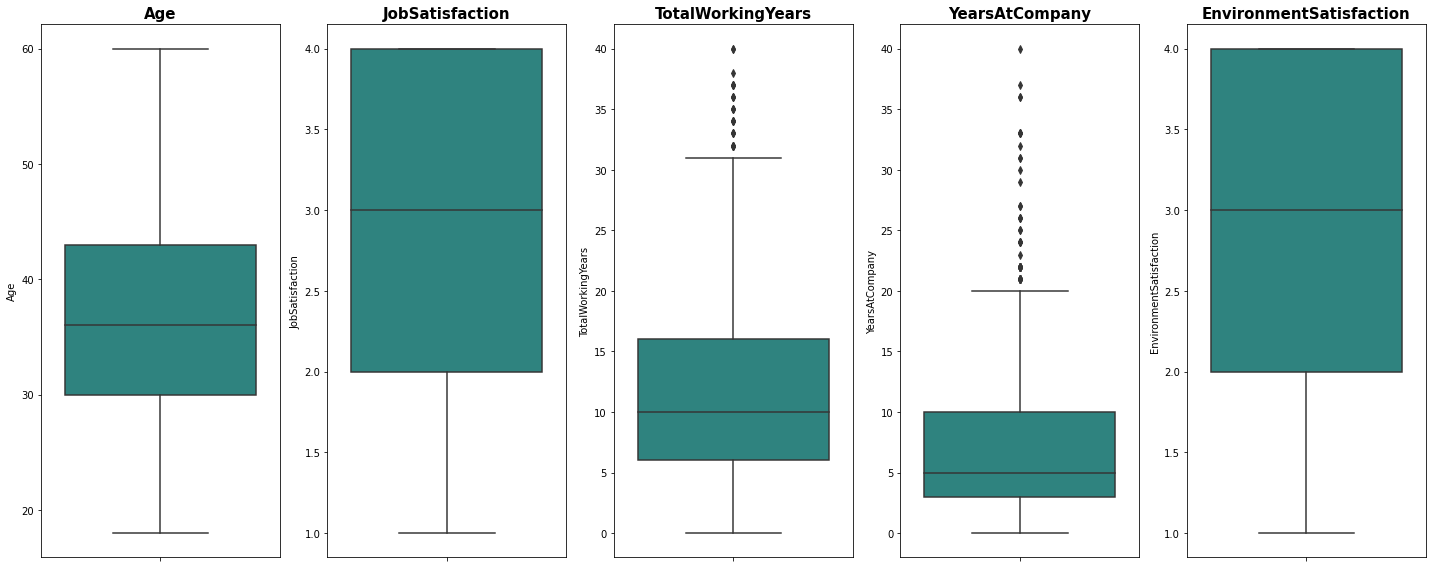

In [79]:
# List of columns to plot
columns_to_plot = ['Age', 'JobSatisfaction', 'TotalWorkingYears', 'YearsAtCompany', 'EnvironmentSatisfaction']

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(20, 8))

# Create boxplots for each column
for i, col in enumerate(columns_to_plot):
    sns.boxplot(y=data[col], ax=axes[i], palette="viridis")
    axes[i].set_title(col, fontweight="black", size=15)
    axes[i].set_xlabel('')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


The maximum age of employees is 60 and lowest is 18.
For job satisfaction the highest is 4 and the lowest is 1.
The highest value for total working years is 40 and lowest is zero.
Also the highest value for YearsAtCompany is 40 lowest is zero.
Environmental Satisfaction has the highest value being 4 and lowest 1.

From this, we can say there are no potential outliers.



## Decision trees or apply other visualisation technique

1. Create a logistic regression model using the provided dataset

In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the selected features
selected_features = [
    'TotalWorkingYears', 'JobLevel','Age',
    'MonthlyIncome', 'YearsWithCurrManager', 'YearsInCurrentRole',
    'YearsAtCompany', 'JobInvolvement', 'JobSatisfaction',
    'EnvironmentSatisfaction'
]

# Define the target variable
target = 'Attrition'

# Split the data into features (X) and target (y)
X = data[selected_features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.8495145631067961
Confusion Matrix:
 [[175   0]
 [ 31   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       175
           1       0.00      0.00      0.00        31

    accuracy                           0.85       206
   macro avg       0.42      0.50      0.46       206
weighted avg       0.72      0.85      0.78       206



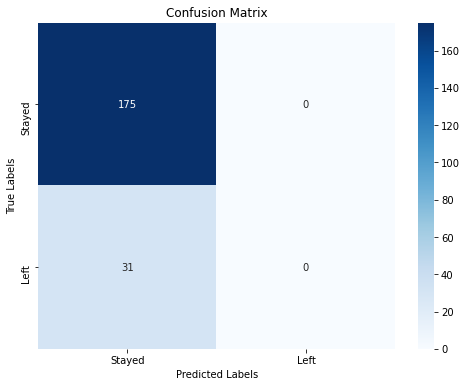

In [87]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [88]:
# Extract the values from the confusion matrix
TN, FP, FN, TP = cm.ravel()

# Calculate Type I and Type II error rates
type_I_error_rate = FP / (FP + TN) if (FP + TN) != 0 else 0
type_II_error_rate = FN / (FN + TP) if (FN + TP) != 0 else 0

# Print the results
print(f"Type I Error Rate (False Positive Rate): {type_I_error_rate}")
print(f"Type II Error Rate (False Negative Rate): {type_II_error_rate}")

Type I Error Rate (False Positive Rate): 0.0
Type II Error Rate (False Negative Rate): 1.0


True Negative (TN): 175 - The model correctly predicted 175 employees who stayed.
False Positive (FP): 0 - The model incorrectly predicted 0 employees who left (false positives).
False Negative (FN): 31 - The model incorrectly predicted 31 employees who stayed (false negatives).
True Positive (TP): 0 - The model correctly predicted 0 employees who left.

2. Which are the factors that matter when retaining employees? Explain

In [89]:
feature_names = X.columns
coefficients = model.coef_[0] 

# Create a DataFrame with feature names and their coefficients
df_feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': coefficients})

# Sort the DataFrame by importance values in descending order
df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)
print(df_feature_importance)


                   Feature  Importance
6           YearsAtCompany    0.046062
2                      Age    0.004368
3            MonthlyIncome   -0.000008
9  EnvironmentSatisfaction   -0.025147
5       YearsInCurrentRole   -0.047776
0        TotalWorkingYears   -0.053495
1                 JobLevel   -0.059143
4     YearsWithCurrManager   -0.081010
8          JobSatisfaction   -0.161074
7           JobInvolvement   -0.347857


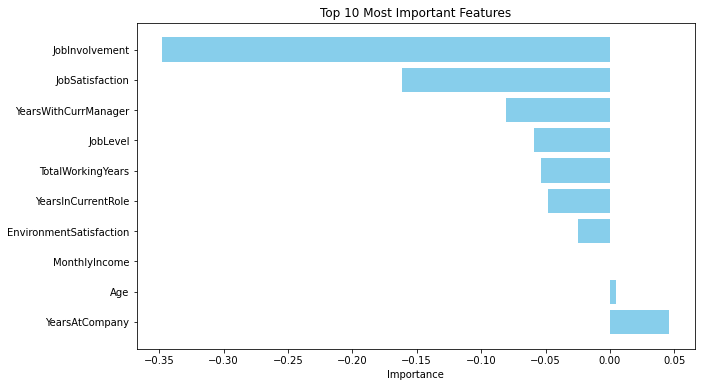

In [90]:
# Number of top features to plot
top_n = 10  
# Extract the top N most important features and their importance values
top_features = df_feature_importance.iloc[:top_n, :]
top_features = top_features[::-1] 

# Plot the top N most important features
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top {} Most Important Features'.format(top_n))
plt.gca().invert_yaxis() 
plt.show()


3. Which are the condition(s) that will likely lead to employee attrition? Explain

From the analysis,most employees who have left worked for the Research & Development department, with most of them being laboratory technicians, sales executives or research scientists.it's preoccupying that a large amount of them said they've had a low satisfaction with the work environment.

The majority of employees who have left were among those with the smaller monthly income, with a monthly income varying from 2.000 to 3.000. Those who've less percent salary hike also tend to leave more than those with a higher percentual hike in salary.

Lack of promotions may be a crucial factor to attritions


4. Based on the conducted analysis, what other value added observations can you make?


More senior employees have higher total working years.

Higher performance ratings lead to salary hike percentage to increase

The more years an employee puts in, the more their monthly income increases
